In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils

In [7]:
f = pd.read_csv('df_1300.csv')
s = pd.read_csv('df_10600.csv')
df = pd.concat([f,s], ignore_index = True)

KeyboardInterrupt: 

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Metadata_Well,Metadata_Plate,Metadata_Aggregate_On,efficientnet_0,efficientnet_1,efficientnet_2,efficientnet_3,efficientnet_4,efficientnet_5,efficientnet_6,...,efficientnet_6391,efficientnet_6392,efficientnet_6393,efficientnet_6394,efficientnet_6395,efficientnet_6396,efficientnet_6397,efficientnet_6398,efficientnet_6399,Metadata_Well_Position
0,A01,SQ00014812,well,-0.142897,-0.113506,-0.130975,-0.037416,-0.107066,-0.142255,-0.101672,...,-0.141283,-0.174196,-0.114794,-0.141811,0.193496,-0.040117,-0.155768,-0.070296,0.613512,SQ00014812/A01
1,A02,SQ00014812,well,-0.147132,-0.117449,-0.138457,-0.007375,-0.106333,-0.156632,-0.108970,...,-0.154953,-0.184615,-0.118525,-0.148998,0.231997,-0.039789,-0.147204,-0.067097,0.420422,SQ00014812/A02
2,A03,SQ00014812,well,-0.154955,-0.128911,-0.139572,-0.032888,-0.108059,-0.161863,-0.109339,...,-0.154065,-0.185680,-0.121558,-0.147461,0.299611,-0.039168,-0.152627,-0.073011,0.588260,SQ00014812/A03
3,A04,SQ00014812,well,-0.160671,-0.133710,-0.155048,-0.018638,-0.104549,-0.171953,-0.112013,...,-0.156909,-0.185617,-0.119637,-0.148401,0.239812,-0.039476,-0.147047,-0.074182,0.510465,SQ00014812/A04
4,A05,SQ00014812,well,-0.159718,-0.137615,-0.153945,-0.028853,-0.100508,-0.169278,-0.111453,...,-0.151267,-0.181471,-0.117698,-0.159351,0.222006,-0.038631,-0.150220,-0.075038,0.569536,SQ00014812/A05


In [8]:
df = pd.read_csv('raw.csv.gz')

In [7]:
index = pd.read_csv('sub_index.csv')
index.drop_duplicates(subset=['Metadata_Plate', 'Metadata_Well'], keep='first', inplace=True, ignore_index=True)

In [11]:
df_meta = pd.merge(df, index, how='left', on=['Metadata_Plate', 'Metadata_Well'], validate='one_to_one')

In [34]:
features = []
for col in df_meta.columns.tolist():
    if col.startswith('efficientnet_'):
        features.append(col)
meta_features = []
for col in df_meta.columns.tolist():
    if not col.startswith('efficientnet_'):
        meta_features.append(col)

In [35]:
df = df_meta[meta_features + features]

In [36]:
agg = aggregate(
    df,
    strata=["Metadata_broad_sample"],
    features=features
)

In [ ]:
agg1 = aggregate(
    df,
    strata=["Metadata_broad_sample", 'Metadata_moa'],
    features=features
)

In [66]:
agg.head()

,Metadata_broad_sample,efficientnet_0,efficientnet_1,efficientnet_2,efficientnet_3,efficientnet_4,efficientnet_5,efficientnet_6,efficientnet_7,efficientnet_8,...,efficientnet_6390,efficientnet_6391,efficientnet_6392,efficientnet_6393,efficientnet_6394,efficientnet_6395,efficientnet_6396,efficientnet_6397,efficientnet_6398,efficientnet_6399
0,BRD-A02006392-001-10-7,-0.176622,-0.142385,-0.152750,0.104187,-0.084907,-0.179724,-0.112525,-0.162467,-0.098899,...,-0.102999,-0.178541,-0.187841,-0.128411,-0.182296,0.611269,-0.034899,-0.160830,-0.075636,0.648274
1,BRD-A02710418-003-11-8,-0.173832,-0.142791,-0.155356,0.073125,-0.092427,-0.179326,-0.115437,-0.157393,-0.116601,...,-0.091052,-0.177236,-0.188499,-0.124815,-0.186094,0.665411,-0.034742,-0.157554,-0.068091,0.737472
2,BRD-A05457250-001-05-0,-0.176071,-0.155749,-0.161774,-0.035939,-0.093066,-0.193235,-0.113029,-0.161600,-0.060474,...,-0.124540,-0.166737,-0.184532,-0.116635,-0.180021,0.423900,-0.034277,-0.153299,-0.077206,0.609096
3,BRD-A07986123-001-02-8,-0.155393,-0.126701,-0.122958,0.211526,-0.094230,-0.176516,-0.102316,-0.139009,-0.145905,...,-0.105283,-0.167146,-0.179106,-0.123810,-0.179431,0.493881,-0.037998,-0.164276,-0.082315,0.770513
4,BRD-A09349126-001-10-7,-0.175576,-0.139735,-0.159090,0.096396,-0.088254,-0.174185,-0.112148,-0.156863,-0.107829,...,-0.097718,-0.177781,-0.187269,-0.125494,-0.186077,0.641501,-0.034614,-0.156627,-0.071017,0.779743


In [67]:
agg1.Metadata_moa.value_counts()

phosphodiesterase inhibitor                                                                                                    28
adrenergic receptor antagonist                                                                                                 22
cyclooxygenase inhibitor                                                                                                       20
histamine receptor antagonist                                                                                                  20
acetylcholine receptor antagonist                                                                                              18
                                                                                                                               ..
adrenergic inhibitor                                                                                                            1
membrane permeability inhibitor                                                           

In [37]:
lincs_df = pd.read_csv('../../../baseline/01_data/2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz')
lincs_df = lincs_df[['Metadata_broad_sample',
       'Metadata_pert_well', 'Metadata_mmoles_per_liter',
       'Metadata_dose_recode', 'Metadata_time_point', 'Metadata_moa',
       'Metadata_target']]

In [38]:
lincs_df = lincs_df.drop_duplicates(['Metadata_broad_sample'], keep='first')

In [39]:
df = pd.merge(agg, lincs_df, how='left', on=['Metadata_broad_sample'])

In [75]:
df

,Metadata_broad_sample,efficientnet_0,efficientnet_1,efficientnet_2,efficientnet_3,efficientnet_4,efficientnet_5,efficientnet_6,efficientnet_7,efficientnet_8,...,efficientnet_6396,efficientnet_6397,efficientnet_6398,efficientnet_6399,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_time_point,Metadata_moa,Metadata_target
0,BRD-A02006392-001-10-7,-0.176622,-0.142385,-0.152750,0.104187,-0.084907,-0.179724,-0.112525,-0.162467,-0.098899,...,-0.034899,-0.160830,-0.075636,0.648274,G19,10.0,6,48H,calcium channel blocker,CACNA1D|CACNA2D1|KCNN4
1,BRD-A02710418-003-11-8,-0.173832,-0.142791,-0.155356,0.073125,-0.092427,-0.179326,-0.115437,-0.157393,-0.116601,...,-0.034742,-0.157554,-0.068091,0.737472,O13,10.0,6,48H,opioid receptor agonist,BCHE
2,BRD-A05457250-001-05-0,-0.176071,-0.155749,-0.161774,-0.035939,-0.093066,-0.193235,-0.113029,-0.161600,-0.060474,...,-0.034277,-0.153299,-0.077206,0.609096,I13,10.0,6,48H,L-type calcium channel blocker,unknown
3,BRD-A07986123-001-02-8,-0.155393,-0.126701,-0.122958,0.211526,-0.094230,-0.176516,-0.102316,-0.139009,-0.145905,...,-0.037998,-0.164276,-0.082315,0.770513,A13,10.0,6,48H,androgen receptor modulator,AR|CYP17A1
4,BRD-A09349126-001-10-7,-0.175576,-0.139735,-0.159090,0.096396,-0.088254,-0.174185,-0.112148,-0.156863,-0.107829,...,-0.034614,-0.156627,-0.071017,0.779743,G07,10.0,6,48H,progesterone receptor agonist,PGR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,BRD-K99545815-001-06-3,-0.143891,-0.061975,-0.140031,0.296240,-0.083314,-0.028642,-0.081474,-0.097347,-0.099110,...,-0.044580,-0.165797,-0.086623,0.833252,M19,10.0,6,48H,focal adhesion kinase inhibitor,PTK2|PTK2B
930,BRD-K99604664-001-01-1,-0.158073,-0.118083,-0.132081,0.092220,-0.101030,-0.176034,-0.106032,-0.135580,-0.135449,...,-0.044317,-0.170153,-0.077641,0.713382,N19,10.0,6,48H,progesterone receptor agonist,PGR
931,BRD-K99749624-001-07-0,-0.150438,-0.113825,-0.127900,-0.038900,-0.106032,-0.123990,-0.106113,-0.119545,-0.143794,...,-0.037606,-0.177550,-0.080994,0.960181,N13,10.0,6,48H,PDGFR tyrosine kinase receptor inhibitor|VEGFR...,CSF1|CSF1R|FLT1|FLT3|FLT4|KDR|KIT|PDGFRB|RET|TEK
932,BRD-K99792991-001-34-9,-0.148306,-0.106373,-0.082971,0.160005,-0.093079,-0.153175,-0.096187,-0.120803,-0.135865,...,-0.034360,-0.165817,-0.107996,1.076423,M19,10.0,6,48H,potassium channel activator,GLUD1|SDHD


In [17]:
features = []
for col in df.columns.tolist():
    if col.startswith('efficientnet_'):
        features.append(col)
meta_features = []
for col in df.columns.tolist():
    if not col.startswith('efficientnet_'):
        meta_features.append(col)


In [43]:
df = df[meta_features + features]

In [44]:
df.to_csv('aggregate_sample.csv', index=False)

In [14]:
df_norm = normalize(
    profiles=df,
    features=features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='mad_robustize',
    output_file='none'
)

In [18]:
df.efficientnet_0.min()

-0.1820418834686279

In [5]:
df.equals(df1)

False

In [24]:
df.shape

(7605, 6404)

In [23]:
df_meta.shape

(7605, 6422)

In [19]:
index.head()


,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,RNA,ER,AGP,Mito,DNA,Concentration,Treatment_ID,Compound,pert_iname,Treatment_Replicate,Treatment,Plate_Map_Name,Split
0,SQ00014812,A01,1,DMSO,unknown,0.0,0,SQ00014812/r01c01f01p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c01f01p01-ch2sk1fk1fl1.tiff,SQ00014812/r01c01f01p01-ch4sk1fk1fl1.tiff,SQ00014812/r01c01f01p01-ch5sk1fk1fl1.tiff,SQ00014812/r01c01f01p01-ch1sk1fk1fl1.tiff,NaN,0,DMSO,NaN,1,DMSO@NA,C-7161-01-LM6-022,Training
1,SQ00014812,A02,1,DMSO,unknown,0.0,0,SQ00014812/r01c02f01p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c02f01p01-ch2sk1fk1fl1.tiff,SQ00014812/r01c02f01p01-ch4sk1fk1fl1.tiff,SQ00014812/r01c02f01p01-ch5sk1fk1fl1.tiff,SQ00014812/r01c02f01p01-ch1sk1fk1fl1.tiff,NaN,0,DMSO,NaN,2,DMSO@NA,C-7161-01-LM6-022,Training
2,SQ00014812,A03,1,DMSO,unknown,0.0,0,SQ00014812/r01c03f01p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c03f01p01-ch2sk1fk1fl1.tiff,SQ00014812/r01c03f01p01-ch4sk1fk1fl1.tiff,SQ00014812/r01c03f01p01-ch5sk1fk1fl1.tiff,SQ00014812/r01c03f01p01-ch1sk1fk1fl1.tiff,NaN,0,DMSO,NaN,3,DMSO@NA,C-7161-01-LM6-022,Training
3,SQ00014812,A04,1,DMSO,unknown,0.0,0,SQ00014812/r01c04f01p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c04f01p01-ch2sk1fk1fl1.tiff,SQ00014812/r01c04f01p01-ch4sk1fk1fl1.tiff,SQ00014812/r01c04f01p01-ch5sk1fk1fl1.tiff,SQ00014812/r01c04f01p01-ch1sk1fk1fl1.tiff,NaN,0,DMSO,NaN,4,DMSO@NA,C-7161-01-LM6-022,Training
4,SQ00014812,A05,1,DMSO,unknown,0.0,0,SQ00014812/r01c05f01p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c05f01p01-ch2sk1fk1fl1.tiff,SQ00014812/r01c05f01p01-ch4sk1fk1fl1.tiff,SQ00014812/r01c05f01p01-ch5sk1fk1fl1.tiff,SQ00014812/r01c05f01p01-ch1sk1fk1fl1.tiff,NaN,0,DMSO,NaN,5,DMSO@NA,C-7161-01-LM6-022,Training


In [41]:
df.Metadata_broad_sample.value_counts()

BRD-K70463136-001-01-5    1
BRD-K54006094-051-01-7    1
BRD-K20958582-001-01-4    1
BRD-A06935312-001-04-3    1
BRD-K51263939-001-08-6    1
                         ..
BRD-K06335600-003-20-7    1
BRD-K70464547-003-01-2    1
BRD-K00494077-066-01-9    1
BRD-A97479839-003-13-3    1
BRD-K07691486-001-15-5    1
Name: Metadata_broad_sample, Length: 1144, dtype: int64

In [74]:
df

,Metadata_broad_sample,efficientnet_0,efficientnet_1,efficientnet_2,efficientnet_3,efficientnet_4,efficientnet_5,efficientnet_6,efficientnet_7,efficientnet_8,...,efficientnet_6396,efficientnet_6397,efficientnet_6398,efficientnet_6399,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_time_point,Metadata_moa,Metadata_target
0,BRD-A02006392-001-10-7,-0.176622,-0.142385,-0.152750,0.104187,-0.084907,-0.179724,-0.112525,-0.162467,-0.098899,...,-0.034899,-0.160830,-0.075636,0.648274,G19,10.0,6,48H,calcium channel blocker,CACNA1D|CACNA2D1|KCNN4
1,BRD-A02710418-003-11-8,-0.173832,-0.142791,-0.155356,0.073125,-0.092427,-0.179326,-0.115437,-0.157393,-0.116601,...,-0.034742,-0.157554,-0.068091,0.737472,O13,10.0,6,48H,opioid receptor agonist,BCHE
2,BRD-A05457250-001-05-0,-0.176071,-0.155749,-0.161774,-0.035939,-0.093066,-0.193235,-0.113029,-0.161600,-0.060474,...,-0.034277,-0.153299,-0.077206,0.609096,I13,10.0,6,48H,L-type calcium channel blocker,unknown
3,BRD-A07986123-001-02-8,-0.155393,-0.126701,-0.122958,0.211526,-0.094230,-0.176516,-0.102316,-0.139009,-0.145905,...,-0.037998,-0.164276,-0.082315,0.770513,A13,10.0,6,48H,androgen receptor modulator,AR|CYP17A1
4,BRD-A09349126-001-10-7,-0.175576,-0.139735,-0.159090,0.096396,-0.088254,-0.174185,-0.112148,-0.156863,-0.107829,...,-0.034614,-0.156627,-0.071017,0.779743,G07,10.0,6,48H,progesterone receptor agonist,PGR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,BRD-K99545815-001-06-3,-0.143891,-0.061975,-0.140031,0.296240,-0.083314,-0.028642,-0.081474,-0.097347,-0.099110,...,-0.044580,-0.165797,-0.086623,0.833252,M19,10.0,6,48H,focal adhesion kinase inhibitor,PTK2|PTK2B
930,BRD-K99604664-001-01-1,-0.158073,-0.118083,-0.132081,0.092220,-0.101030,-0.176034,-0.106032,-0.135580,-0.135449,...,-0.044317,-0.170153,-0.077641,0.713382,N19,10.0,6,48H,progesterone receptor agonist,PGR
931,BRD-K99749624-001-07-0,-0.150438,-0.113825,-0.127900,-0.038900,-0.106032,-0.123990,-0.106113,-0.119545,-0.143794,...,-0.037606,-0.177550,-0.080994,0.960181,N13,10.0,6,48H,PDGFR tyrosine kinase receptor inhibitor|VEGFR...,CSF1|CSF1R|FLT1|FLT3|FLT4|KDR|KIT|PDGFRB|RET|TEK
932,BRD-K99792991-001-34-9,-0.148306,-0.106373,-0.082971,0.160005,-0.093079,-0.153175,-0.096187,-0.120803,-0.135865,...,-0.034360,-0.165817,-0.107996,1.076423,M19,10.0,6,48H,potassium channel activator,GLUD1|SDHD


In [7]:

index = pd.read_csv('sub_index.csv')

In [10]:
index.drop_duplicates(subset=['Metadata_Plate', 'Metadata_Well'], keep='first', inplace=True, ignore_index=True)


In [11]:
index.duplicated(subset=['Metadata_Plate', 'Metadata_Well']).value_counts()

False    8763
dtype: int64

In [12]:
index.Metadata_broad_sample.value_counts()


DMSO                      3252
BRD-A12077521-003-01-5       5
BRD-K05524748-003-04-4       5
BRD-K73794685-001-01-5       5
BRD-K83057217-001-01-2       5
                          ... 
BRD-K43002771-034-01-6       2
BRD-A40787240-066-04-6       2
BRD-K42981054-001-01-9       2
BRD-K43578482-001-01-4       2
BRD-K41434598-003-01-9       2
Name: Metadata_broad_sample, Length: 1144, dtype: int64

In [13]:
df.duplicated(subset=['Metadata_Plate', 'Metadata_Well']).value_counts()

False    10578
dtype: int64

In [20]:
df[['Metadata_Plate', 'Metadata_Well']]

,Metadata_Plate,Metadata_Well
0,SQ00014812,A01
1,SQ00014812,A02
2,SQ00014812,A03
3,SQ00014812,A04
4,SQ00014812,A05
...,...,...
10573,SQ00015231,M01
10574,SQ00015231,M07
10575,SQ00015231,M13
10576,SQ00015231,M19


In [21]:
index[['Metadata_Plate', 'Metadata_Well']]

,Metadata_Plate,Metadata_Well
0,SQ00014812,A01
1,SQ00014812,A02
2,SQ00014812,A03
3,SQ00014812,A04
4,SQ00014812,A05
...,...,...
8758,SQ00015198,P13
8759,SQ00015230,P13
8760,SQ00015231,P13
8761,SQ00015232,P13


In [22]:
index.Metadata_moa.value_counts()


unknown                                         3252
phosphodiesterase inhibitor                      162
adrenergic receptor antagonist                   155
cyclooxygenase inhibitor                         132
histamine receptor antagonist                    122
                                                ... 
neprilysin inhibitor                               9
focal adhesion kinase inhibitor                    7
tricyclic antidepressant                           7
calmodulin antagonist                              7
estrogen receptor agonist|estrogenic hormone       6
Name: Metadata_moa, Length: 235, dtype: int64

In [30]:
df_meta.Metadata_broad_sample.value_counts()

DMSO                      3203
BRD-K36467523-001-02-8       5
BRD-K42191735-001-05-3       5
BRD-K91495480-001-02-2       5
BRD-K06335600-003-20-7       5
                          ... 
BRD-K43410529-001-02-3       2
BRD-K42981054-001-01-9       2
BRD-K41524689-001-23-5       2
BRD-A43082555-001-01-1       2
BRD-K37991163-003-13-4       2
Name: Metadata_broad_sample, Length: 1144, dtype: int64

In [25]:
out = pd.merge(df, index, how='outer')

In [28]:
df_meta.Split.value_counts()

Training    8606
Name: Split, dtype: int64

In [29]:
df_meta.Metadata_moa.value_counts()

unknown                                         3203
phosphodiesterase inhibitor                      161
adrenergic receptor antagonist                   155
cyclooxygenase inhibitor                         128
histamine receptor antagonist                    119
                                                ... 
calmodulin antagonist                              7
tricyclic antidepressant                           7
focal adhesion kinase inhibitor                    7
estrogen receptor agonist|estrogenic hormone       6
leukotriene synthesis inhibitor                    6
Name: Metadata_moa, Length: 235, dtype: int64

In [33]:
df_meta.query("Metadata_moa == 'leukotriene synthesis inhibitor'").Metadata_broad_sample

8321     BRD-K59574735-001-11-8
8346     BRD-K39503511-001-03-9
10471    BRD-K59574735-001-11-8
10496    BRD-K39503511-001-03-9
10551    BRD-K59574735-001-11-8
10576    BRD-K39503511-001-03-9
Name: Metadata_broad_sample, dtype: object

In [1]:
df.head()

NameError: name 'df' is not defined

In [13]:
df_meta.Metadata_moa.value_counts()

unknown                                         2309
phosphodiesterase inhibitor                      117
adrenergic receptor antagonist                    95
cyclooxygenase inhibitor                          85
histamine receptor antagonist                     85
                                                ... 
growth hormone secretagogue receptor agonist       4
focal adhesion kinase inhibitor                    4
tyrosinase inhibitor                               4
mucolytic agent                                    3
adrenergic inhibitor                               3
Name: Metadata_moa, Length: 231, dtype: int64

In [14]:
pi = df_meta.query("Metadata_moa == 'phosphodiesterase inhibitor'")

In [15]:
from cytominer_eval.transform import metric_melt


In [19]:
melt = metric_melt(pi,
            features,
            meta_features)

(array([   6.,   22.,   42.,   93.,  333.,  565.,  692.,  578., 1390.,
        3065.]),
 array([0.77576301, 0.79808779, 0.82041257, 0.84273735, 0.86506212,
        0.8873869 , 0.90971168, 0.93203646, 0.95436124, 0.97668601,
        0.99901079]),
 <BarContainer object of 10 artists>)

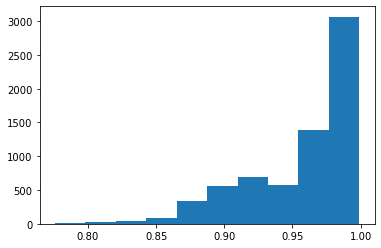

In [21]:
plt.hist(melt.similarity_metric)

In [22]:
sample = df_meta.query("Metadata_broad_sample == 'BRD-K36467523-001-02-8'")

In [23]:
melt = metric_melt(sample,
            features,
            meta_features)

(array([3., 1., 3., 0., 0., 0., 0., 0., 0., 3.]),
 array([0.98718879, 0.98824938, 0.98930998, 0.99037058, 0.99143117,
        0.99249177, 0.99355236, 0.99461296, 0.99567356, 0.99673415,
        0.99779475]),
 <BarContainer object of 10 artists>)

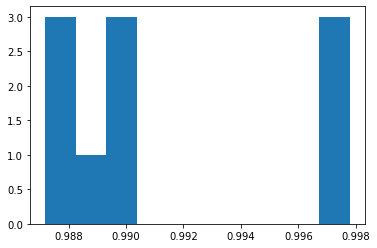

In [24]:
plt.hist(melt.similarity_metric)

In [4]:
df = pd.read_csv('raw.csv.gz')

In [12]:
index.Metadata_moa.value_counts()

unknown                                         3252
phosphodiesterase inhibitor                      162
adrenergic receptor antagonist                   155
cyclooxygenase inhibitor                         132
histamine receptor antagonist                    122
                                                ... 
mucolytic agent                                    9
calmodulin antagonist                              7
focal adhesion kinase inhibitor                    7
tricyclic antidepressant                           7
estrogen receptor agonist|estrogenic hormone       6
Name: Metadata_moa, Length: 235, dtype: int64

In [6]:
lincs_df = pd.read_csv('../../../baseline/01_data/2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz')
lincs_df = lincs_df[['Metadata_broad_sample',
   'Metadata_pert_well', 'Metadata_moa',
   'Metadata_target']]
lincs_df = lincs_df.drop_duplicates(['Metadata_broad_sample'], keep='first')

In [8]:
index.columns

Index(['Metadata_Plate', 'Metadata_Well', 'Metadata_Site',
       'Metadata_broad_sample', 'Metadata_moa', 'Metadata_mmoles_per_liter',
       'Metadata_dose_recode', 'RNA', 'ER', 'AGP', 'Mito', 'DNA',
       'Concentration', 'Treatment_ID', 'Compound', 'pert_iname',
       'Treatment_Replicate', 'Treatment', 'Plate_Map_Name', 'Split'],
      dtype='object')

In [11]:
index = index[['Metadata_Plate', 'Metadata_Well','Metadata_broad_sample', 'Metadata_moa']]

In [36]:
list(dic.values()).count(2)

84

In [43]:
d = pd.merge(df, index, how='left',  on=['Metadata_Plate', 'Metadata_Well',], validate = 'one_to_one')
meta_features = [col for col in d.columns.tolist() if col.startswith('Metadata_')]
features = [col for col in d.columns.tolist() if col.startswith('efficientnet_')]
d = d[meta_features + features]

In [44]:
d.Metadata_moa.value_counts()

unknown                            2309
phosphodiesterase inhibitor         117
adrenergic receptor antagonist       95
cyclooxygenase inhibitor             85
histamine receptor antagonist        85
                                   ... 
tricyclic antidepressant              4
nitric oxide stimulant                4
cannabinoid receptor antagonist       4
adrenergic inhibitor                  3
mucolytic agent                       3
Name: Metadata_moa, Length: 231, dtype: int64

In [73]:
list(dic.values()).count(1)

23

In [53]:
len(d.query("Metadata_moa == 'mucolytic agent'").Metadata_broad_sample.unique())

1

In [52]:
dic['mucolytic agent']

2

In [61]:
moas = d.Metadata_moa.unique()

In [71]:
dic = {}
for moa in d.Metadata_moa.unique():
    dic[moa] = len(d.query("Metadata_moa == @moa").Metadata_broad_sample.unique())


In [65]:
dic[moas[5]]

2

In [69]:
len(d.query("Metadata_moa == @moas[5]").Metadata_broad_sample.unique())


1

In [72]:

dic

{'unknown': 1,
 'acetylcholine receptor antagonist': 18,
 'HMGCR inhibitor': 6,
 'HDAC inhibitor': 10,
 'bacterial DNA gyrase inhibitor': 8,
 'EGFR inhibitor|protein tyrosine kinase inhibitor': 1,
 'DNA methyltransferase inhibitor': 3,
 nan: 0,
 'fungal squalene epoxidase inhibitor': 3,
 'benzodiazepine receptor agonist': 5,
 'PKC activator': 2,
 'adrenergic receptor agonist': 17,
 'Aurora kinase inhibitor': 6,
 'gamma secretase inhibitor': 6,
 'glutamate receptor antagonist': 6,
 'CFTR channel agonist': 2,
 'calcium channel blocker': 14,
 'serotonin receptor agonist|serotonin receptor antagonist': 3,
 'EGFR inhibitor': 15,
 'hypoxia inducible factor inhibitor': 2,
 'DNA alkylating agent': 5,
 'sodium channel blocker': 12,
 'XIAP inhibitor': 3,
 'HSP inhibitor': 4,
 'AKT inhibitor': 6,
 'angiotensin converting enzyme inhibitor': 10,
 'leukotriene receptor antagonist': 4,
 '5 alpha reductase inhibitor': 3,
 'adrenergic receptor antagonist': 22,
 'c-Met inhibitor': 1,
 'vitamin D recepto